## Rejection sampling

In [1]:
import numpy as np

In [2]:
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

def p(x):
    return st.norm.pdf(x, loc=30, scale=10) + st.norm.pdf(x, loc=80, scale=20)

def q(x):
    return st.norm.pdf(x, loc=50, scale=30)

x = np.arange(-50, 151)
M = max(p(x) / q(x))

def rejection_sampling(iter=1000):
    samples = []

    for i in range(iter):
        z = np.random.normal(50, 30)
        u = np.random.uniform(0, M*q(z))

        if u <= p(z):
            samples.append(z)

    return np.array(samples)

3.9146256816520806


(-50.0, 150.0)

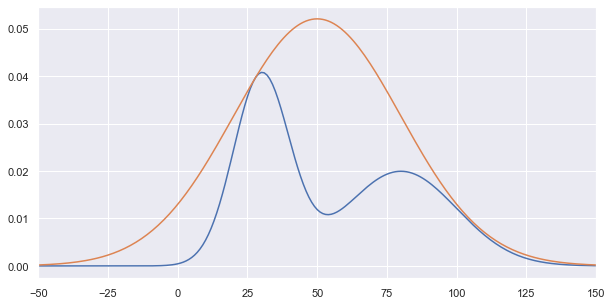

In [3]:
print(M)
fig = plt.figure(figsize=(10,5))
ax = fig.subplots(1,1)
ax.plot(x, p(x))
ax.plot(x, M*q(x))
plt.xlim([-50, 150])
# fig.savefig('RS_target_proposal.svg')
# fig.savefig('RS_target_proposal.png')


In [8]:
s = rejection_sampling(iter=10000)

(-50.0, 150.0)

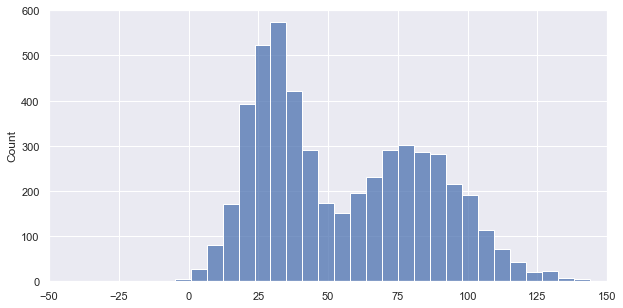

In [9]:
fig = plt.figure(figsize=(10,5))
ax = fig.subplots(1,1)
sns.histplot(s, ax=ax)
plt.xlim([-50, 150])